In [41]:
import pandas as pd
import glob

In [42]:
comm_paths = glob.glob("data/Commentaries/*.csv")
len(comm_paths)

0

In [43]:
report_paths = glob.glob("data/Reports/*.txt")
len(report_paths)

0

In [44]:
comm_fno = []
for i in comm_paths:
    fno = int(i.split("\\")[-1].split("_")[-1].split(".")[0])
    comm_fno.append(fno)

report_fno = []
for j in report_paths:
    fno = int(j.split("\\")[-1].replace("report", "").split(".")[0])
    report_fno.append(fno)

comm_fno = set(comm_fno)
report_fno = set(report_fno)

In [45]:
to_read_fno = list(comm_fno.intersection(report_fno))

In [46]:
comm_read_paths = []
for i in comm_paths:
    fno = int(i.split("\\")[-1].split("_")[-1].split(".")[0])
    if fno in to_read_fno:
        comm_read_paths.append(i)

report_read_paths = []
for j in report_paths:
    fno = int(j.split("\\")[-1].replace("report", "").split(".")[0])
    if fno in to_read_fno:
        report_read_paths.append(j)

In [47]:
len(comm_read_paths) == len(report_read_paths)

True

In [48]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-large")

In [49]:
def commentary_read(path):
    test_str_lst = pd.read_csv(path)["Data"].to_list()
    comm_inp_lst = []
    cnt = 0
    for i in test_str_lst:
        j = i.lower()
        if "run" not in j:
            if cnt==0 or cnt>=len(test_str_lst)-3:
                comm_inp_lst.append(i)
            elif " bye " not in j and " wide " not in j and "extra" not in j:
                if " out " in j:
                    comm_inp_lst.append(i)
                elif "wicket" in j:
                    comm_inp_lst.append(i)
            else:
                if random.choice([0,1]) == 1:
                    comm_inp_lst.append(i)
        elif " six " in j:
            if random.choice([0,1,0,0]) == 1:
                comm_inp_lst.append(i)
        cnt = cnt + 1
    return ' '.join(comm_inp_lst)

In [50]:
def report_read(path):
    with open(path) as f:
        report_str = f.read()
    return report_str

In [51]:
final_commentaries = []
final_reports = []
for i in comm_read_paths:
    final_commentaries.append(commentary_read(i))
for j in report_read_paths:
    final_reports.append(report_read(j))

In [52]:
final_df = pd.DataFrame({
    "Commentary_Highlights" : final_commentaries,
    "Match_Report" : final_reports
})
final_df

,Commentary_Highlights,Match_Report


In [53]:
final_df.to_parquet("data/match_report_gen.parquet", index=False)
final_df.to_csv("data/match_report_gen.csv", index=False)

In [54]:
final_df

,Commentary_Highlights,Match_Report


In [55]:
final_df["src_len"] = final_df["Commentary_Highlights"].map(lambda x : len(tokenizer(x)["input_ids"]))
final_df["tgt_len"] = final_df["Match_Report"].map(lambda x : len(tokenizer(x)["input_ids"]))

In [56]:
final_df

,Commentary_Highlights,Match_Report,src_len,tgt_len


In [59]:
final_df["Commentary_Highlights"][0]

KeyError: 0

C:\Users\manik\AppData\Local\Temp\ipykernel_13404\1184740705.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df["src_len"])
c:\Users\manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\Users\manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered i

<Axes: xlabel='src_len'>

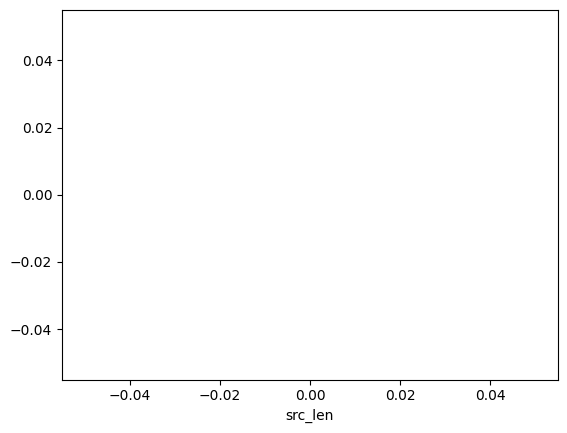

In [58]:
import seaborn as sns
sns.distplot(final_df["src_len"])

In [60]:
final_df.describe()

,Commentary_Highlights,Match_Report,src_len,tgt_len
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [61]:
import pandas as pd
df = pd.read_excel("data_new_T5.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'data_new_T5.xlsx'

In [ ]:
df.iloc[0]

input_text     5.30pm Bangladesh have won the toss and will b...
target_text    Bangladesh 122 for 8 (Naim 23, Ellis 2-16, Chr...
Name: 0, dtype: object

In [ ]:
df["src_len"] = df["input_text"].map(lambda x : len(tokenizer(x)["input_ids"]))
df["tgt_len"] = df["target_text"].map(lambda x : len(tokenizer(x)["input_ids"]))

In [ ]:
df.describe()

,src_len,tgt_len
count,463.000000,463.000000
mean,492.846652,268.164147
std,40.271807,55.859702
min,68.000000,100.000000
25%,491.000000,232.500000
50%,500.000000,272.000000
75%,508.000000,307.000000
max,513.000000,439.000000
